In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import linear_model
import pandas as pd
import numpy as np
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

This model will try and predict the day of the year based off of average and minimum temp.


In [2]:
# Reads in observation csv
File_path = "../resources/observation_data.csv"
observation_df = pd.read_csv(File_path)
observation_df

,station_uid,date,maxt,mint,pcpn,snow,snwd,avgt,freeze_day,above_freezing,...,maxt_7_day,mint_7_day,avgt_7_day,precip_7_day,obs_count_7_day,maxt_30_day,mint_30_day,avgt_30_day,precip_30_day,obs_count_30_day
0,10392,2003-03-05,43.0,28.0,0.00,NaN,NaN,35.5,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10392,2003-03-06,43.0,31.0,0.00,NaN,NaN,37.0,1,1,...,43.0,28.0,35.500000,0.00,1.0,43.0,28.0,35.500000,0.00,1.0
2,10392,2003-03-07,45.0,20.0,0.00,NaN,NaN,32.5,1,1,...,43.0,28.0,36.250000,0.00,2.0,43.0,28.0,36.250000,0.00,2.0
3,10392,2003-03-08,59.0,32.0,0.00,NaN,NaN,45.5,1,1,...,45.0,20.0,35.000000,0.00,3.0,45.0,20.0,35.000000,0.00,3.0
4,10392,2003-03-09,55.0,30.0,0.00,NaN,NaN,42.5,1,1,...,59.0,20.0,37.625000,0.00,4.0,59.0,20.0,37.625000,0.00,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,10685,2004-05-12,77.0,63.0,1.65,0.0,NaN,70.0,0,1,...,85.0,40.0,61.428571,0.10,7.0,85.0,21.0,46.500000,3.25,30.0
6408,10685,2004-05-13,92.0,52.0,0.13,NaN,NaN,72.0,0,1,...,85.0,46.0,64.000000,1.75,7.0,85.0,21.0,47.200000,4.90,30.0
6409,10685,2004-05-14,75.0,56.0,0.00,0.0,NaN,65.5,0,1,...,92.0,46.0,66.357143,1.88,7.0,92.0,21.0,47.950000,4.35,30.0
6410,10685,2004-05-15,74.0,57.0,0.00,0.0,NaN,65.5,0,1,...,92.0,52.0,67.285714,1.88,7.0,92.0,21.0,48.883333,4.35,30.0


In [3]:
dayofyear_frost_df = observation_df[["obs_dayofyear", "avgt", "mint",  "freeze_day"]].copy()
dayofyear_frost_df

,obs_dayofyear,avgt,mint,freeze_day
0,64,35.5,28.0,1
1,65,37.0,31.0,1
2,66,32.5,20.0,1
3,67,45.5,32.0,1
4,68,42.5,30.0,1
...,...,...,...,...
6407,133,70.0,63.0,0
6408,134,72.0,52.0,0
6409,135,65.5,56.0,0
6410,136,65.5,57.0,0


In [4]:
# Day 182 of the year is July 1
dayofyear_frost_df.drop(dayofyear_frost_df[dayofyear_frost_df["obs_dayofyear"] > 182].index, inplace=True)
dayofyear_frost_df

,obs_dayofyear,avgt,mint,freeze_day
0,64,35.5,28.0,1
1,65,37.0,31.0,1
2,66,32.5,20.0,1
3,67,45.5,32.0,1
4,68,42.5,30.0,1
...,...,...,...,...
6407,133,70.0,63.0,0
6408,134,72.0,52.0,0
6409,135,65.5,56.0,0
6410,136,65.5,57.0,0


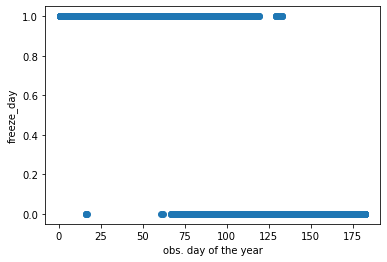

In [5]:
# Create scatter plot to show a freeze day and its corresponding day of the year
plt.scatter(dayofyear_frost_df.obs_dayofyear, dayofyear_frost_df.freeze_day)
plt.xlabel('obs. day of the year')
plt.ylabel('freeze_day')
plt.show()

In [6]:
dayofyear_frost_df = dayofyear_frost_df.dropna()

In [7]:
dayofyear_frost_df = dayofyear_frost_df.reset_index(drop=True)

In [8]:
X = dayofyear_frost_df[["avgt", "mint"]]
y = dayofyear_frost_df["obs_dayofyear"]

In [9]:
regr = linear_model.LinearRegression()
regr.fit(X.values,y)

LinearRegression()

In [10]:
print(regr.coef_)

[ 2.19126151 -0.25091515]


avgt: 2.19126151

mint: -0.25091515

The coefficient tells us as avgt increases by 1 degree the day of year increases by 2.19126151 days and
as mint increases by 1 degree the day of year decreases by -0.25091515 days.

In [11]:
predicted_dayofyear = regr.predict([[50, 30]])
print(f"The predicted day of the year with an average temp of 50 and min temp of 30 is", predicted_dayofyear)

The predicted day of the year with an average temp of 50 and min temp of 30 is [111.11597757]


In [12]:
predicted_dayofyear = regr.predict([[40, 30]])
print(f"The predicted day of the year with an average temp of 40 and min temp of 30 is", predicted_dayofyear)

The predicted day of the year with an average temp of 40 and min temp of 30 is [89.20336244]


Proof of an accurate coefficient

(previous value) + ((new avgt) * (avgt coefficient)) = (new value)

111.11597757 + (-10 * 2.19126151) = 89.20336247